In [150]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex" : "True",
    "font.family": "Times"
})

from tqdm import tqdm

from scipy.linalg import eigh, norm, expm
from scipy.sparse.linalg import expm_multiply
from scipy.optimize import curve_fit

In [151]:
def Ham(N,eps_a,eps_b,eps_c,t_ab,t_bb,t_bc,omega0,g,n_site):
    
    H = np.diag([eps_a/2,eps_b/2,eps_c/2]*N + [omega0/2])
    H += np.diag([-t_ab,-t_bc,0]*(N-1) + [-t_ab,-t_bc] + [0],k=1)
    H += np.diag([0,-t_bb,0]*(N-1) + [0],k=3)

    H[1,n-2] -= t_bb
    H[-1,n_site] -= g

    H += np.conjugate(H.transpose())
    
    return H

In [152]:
def time_evol(H,tstart=0,tstop=1,Num=100,N_em=1,psi=[1.]):
    
    n = np.shape(H)[0]-N_em
    psi_in = np.array([0.]*n + psi)

    temp = expm_multiply(-1.j*H,psi_in,tstart,tstop,Num)
    
    return temp[:,-1], temp[:,:-1]

# A quantum emitter coupled to the double-comb lattice

In [239]:
N = 200 #number of primitive cells
n = 3*N #number of points

# On-site energies
eps_a = eps_c = 0.
eps_b = 2.

# Hopping terms
t_bb = 2.
t_ab = 1.
t_bc = 1.

## Coupling to an A site

We couple the atom to an A site using the hamiltonian
\begin{equation}
    H = g \, (\sigma^+ a_n + \sigma^- a_n^{\dagger})
\end{equation}
where $\sigma^{+(-)}$ are the two-level atom (TLA) ladder operators and $a_n$ is the annihilation operator of a field excitation in the n-th A-site. 

We choose here the transition frequency of the atom ($\omega_0$) and the coupling strenght $g$.

In [266]:
omega0 = 5 #atom frequency
g = 0.1 #atom-cavity coupling

In [267]:
H = Ham(N,eps_a,eps_b,eps_c,t_ab,t_bb,t_bc,omega0,g,n//2)

In [268]:
eigvals, eigvect = eigh(H)

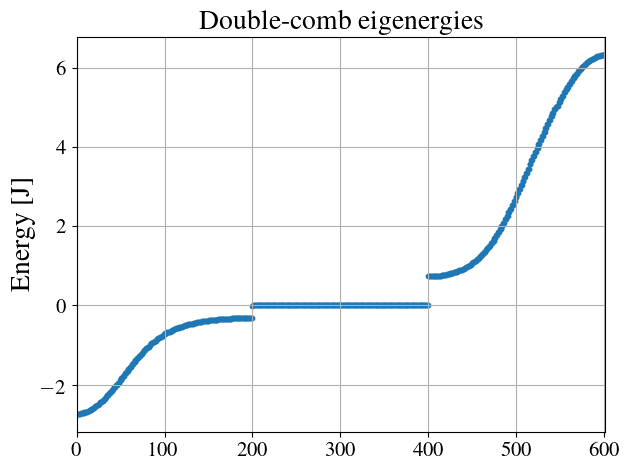

In [269]:
fig, ax = plt.subplots(tight_layout=True)

ax.scatter(np.arange(len(eigvals)),eigvals,s=10)

ax.set_title("Double-comb eigenergies",fontsize=20)
ax.set_ylabel(r"Energy [J]",fontsize=20)

ax.set_xlim(0,len(eigvals))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.grid()
plt.show()

In [ ]:
fig, ax = plt.subplots(nrows=3,ncols=1,sharex=True)

s = -1
bs = eigvect[:-1,s]/norm(eigvect[:-1,s])
ax[0].plot(bs[::3]**2,color="#377eb8")
ax[1].plot(bs[1::3]**2,color='#ff7f00')
ax[2].plot(bs[2::3]**2,color='C4')

ax[0].set_title("Atom-photon Bound state (in-gap FB)",fontsize=20)
ax[2].set_xlabel("\# site",fontsize=20)
ax[0].set_ylabel("Amplitude \n on A sites",fontsize=20)
ax[1].set_ylabel("Amplitude \n on B sites",fontsize=20)
ax[2].set_ylabel("Amplitude \n on C sites",fontsize=20)

ax[2].set_xlim(n//6-5,n//6+5)

#plt.savefig("bs/ingap_res.png")
plt.show()

We calculate the state
\begin{equation}
    |\Psi(t)\rangle = e^{-i\,H\,t} |e,vac\rangle
\end{equation}

In [270]:
t = np.linspace(0,1000,100)
pop, phot = time_evol(H,t[0],t[-1],len(t))

We plot here the time evolution of the atomic part of the wavefunction.

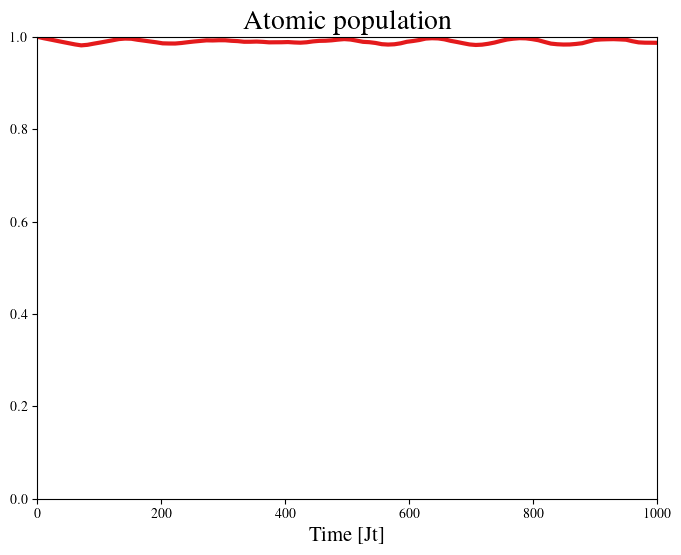

In [271]:
fig = plt.figure(figsize=(8,6))

pop_at = np.real(pop*np.conjugate(pop))
plt.plot(t,pop_at,c='#e41a1c',lw=3,label="Data")

plt.title(f"Atomic population",fontsize=20)
plt.xlabel("Time [Jt]",fontsize=15)

plt.xlim(0,t[-1])
plt.ylim(0.,1)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

#plt.savefig("time-evol/at_A_resFB.png")
plt.show()

In [23]:
pop_phot = np.zeros((n,len(t)))

for i in range(len(t)):
    pop_phot[:,i] = np.real(phot[i,:]*np.conjugate(phot[i,:]))

In [24]:
vec = [20,37,80]

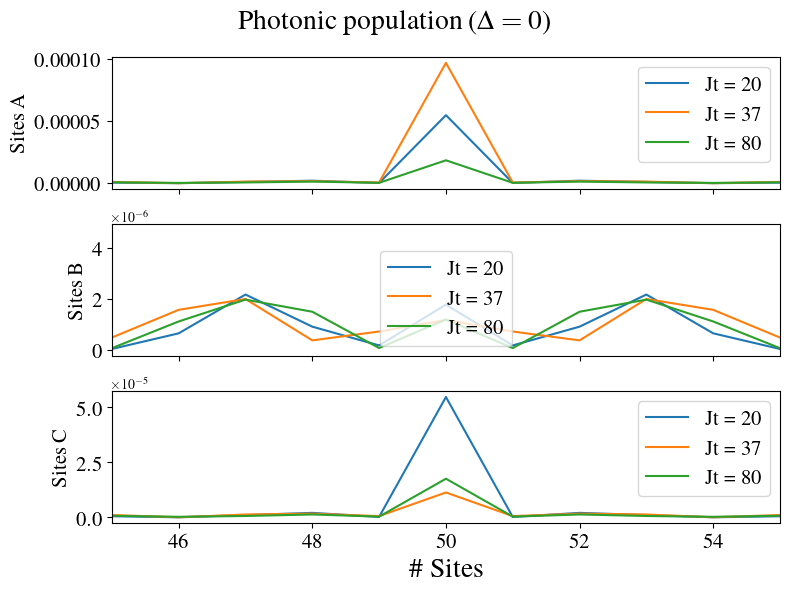

In [25]:
fig, ax = plt.subplots(figsize=(8,6),nrows=3,ncols=1,sharex=True,tight_layout=0)

for s in vec:
    ax[0].plot(pop_phot[::3,s],label=f"Jt = {t[s]:.0f}")
    ax[1].plot(pop_phot[1::3,s],label=f"Jt = {t[s]:.0f}")
    ax[2].plot(pop_phot[2::3,s],label=f"Jt = {t[s]:.0f}")

plt.suptitle(f"Photonic population ($\Delta = 0$)",fontsize=20)
plt.xlabel("\# Sites",fontsize=20)

ax[0].set_ylabel("Sites A",fontsize=15)
ax[1].set_ylabel("Sites B",fontsize=15)
ax[2].set_ylabel("Sites C",fontsize=15)


ax[0].tick_params(axis='both', which='major', labelsize=15)
ax[1].tick_params(axis='both', which='major', labelsize=15)
ax[2].tick_params(axis='both', which='major', labelsize=15)
ax[0].legend(fontsize=15)
ax[1].legend(fontsize=15)
ax[2].legend(fontsize=15)

ax[2].set_xlim(n//6 - 5,n//6 + 5)


#plt.savefig("time-evol/phot_A_resFB.png")

plt.show()

## Coupling to a B site

We couple the atom to a B site using the hamiltonian
\begin{equation}
    H = g \, (\sigma^+ b_n + \sigma^- b_n^{\dagger})
\end{equation}
where $\sigma^{+(-)}$ are the two-level atom (TLA) ladder operators and $b_n$ is the annihilation operator of a field excitation in the n-th B-site. 

In [248]:
omega0 = 3 #atom frequency
g = 0.2 #atom-cavity coupling

In [249]:
H = Ham(N,eps_a,eps_b,eps_c,t_ab,t_bb,t_bc,omega0,g,n//2 + 1)

In [250]:
eigvals, eigvect = eigh(H)

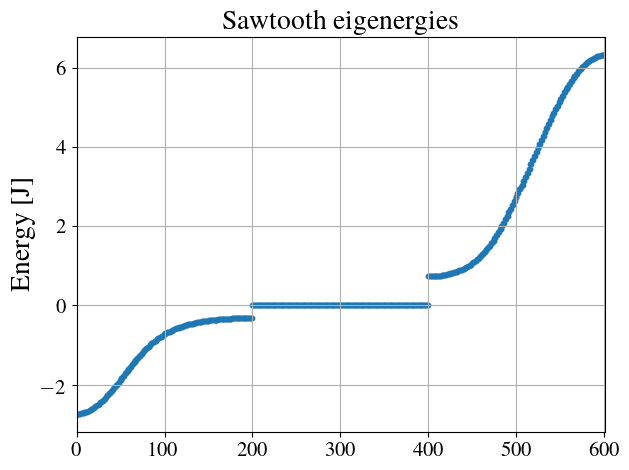

In [251]:
fig, ax = plt.subplots(tight_layout=True)

ax.scatter(np.arange(len(eigvals)),eigvals,s=10)

ax.set_title("Sawtooth eigenergies",fontsize=20)
ax.set_ylabel(r"Energy [J]",fontsize=20)

ax.set_xlim(0,len(eigvals))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.grid()
#plt.savefig("spectrum_sawtooth.png")
plt.show()

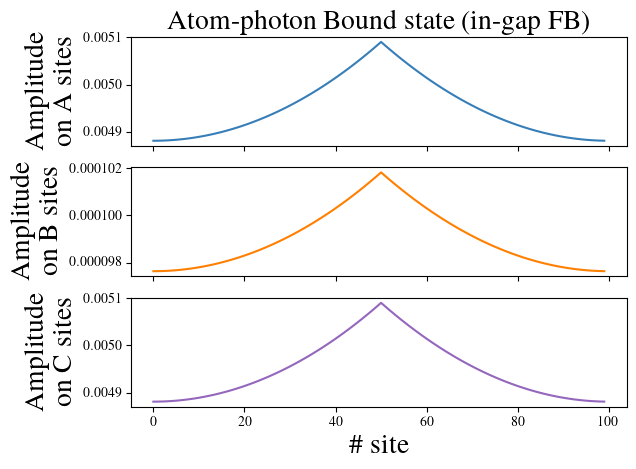

In [115]:
fig, ax = plt.subplots(nrows=3,ncols=1,sharex=True)

s = 200
bs = eigvect[:-1,s]/norm(eigvect[:-1,s])
ax[0].plot(bs[::3]**2,color="#377eb8")
ax[1].plot(bs[1::3]**2,color='#ff7f00')
ax[2].plot(bs[2::3]**2,color='C4')

ax[0].set_title("Atom-photon Bound state (in-gap FB)",fontsize=20)
ax[2].set_xlabel("\# site",fontsize=20)
ax[0].set_ylabel("Amplitude \n on A sites",fontsize=20)
ax[1].set_ylabel("Amplitude \n on B sites",fontsize=20)
ax[2].set_ylabel("Amplitude \n on C sites",fontsize=20)

#ax[2].set_xlim(n//6-5,n//6+5)

#plt.savefig("bs/ingap_res.png")
plt.show()

In [76]:
om_bs = eigvals[s]
print("The energy of the BS is",om_bs)

The energy of the BS is 0.17890818521631405


We calculate the state
\begin{equation}
    |\Psi(t)\rangle = e^{-i\,H\,t} |e,vac\rangle
\end{equation}

In [252]:
t = np.linspace(0,1000,100)
pop, phot = time_evol(H,t[0],t[-1],len(t))

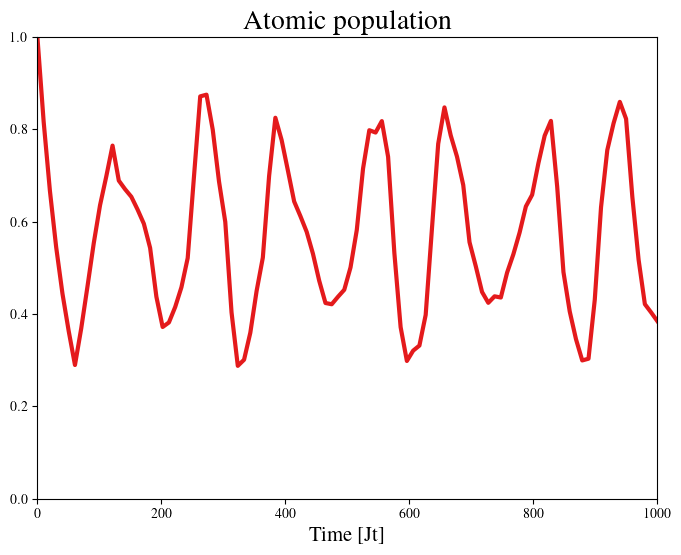

In [253]:
fig = plt.figure(figsize=(8,6))

pop_at = np.real(pop*np.conjugate(pop))
plt.plot(t,pop_at,c='#e41a1c',lw=3,label="Data")

plt.title(f"Atomic population",fontsize=20)
plt.xlabel("Time [Jt]",fontsize=15)

plt.xlim(0,t[-1])
plt.ylim(0.,1)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

#plt.savefig("time-evol/at_A_resFB.png")
plt.show()

In [90]:
pop_phot = np.zeros((n,len(t)))

for i in range(len(t)):
    pop_phot[:,i] = np.real(phot[:,i]*np.conjugate(phot[:,i]))

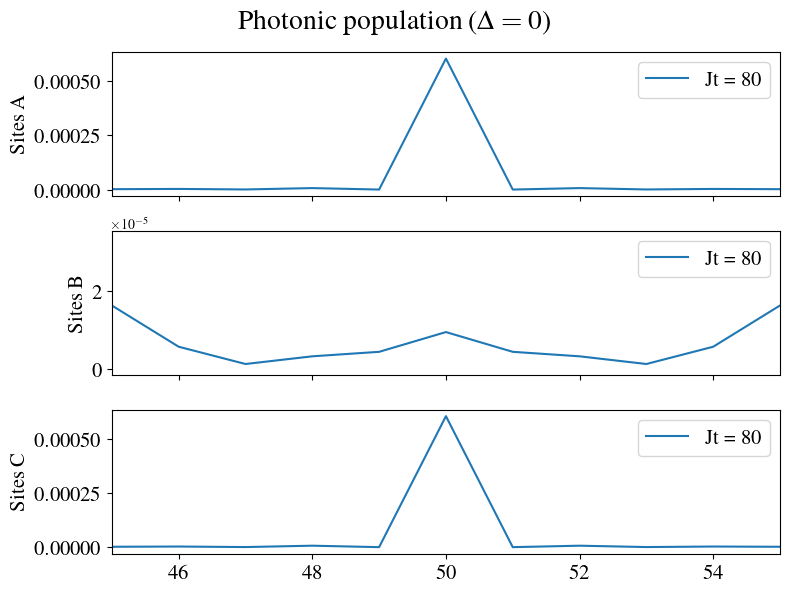

In [92]:
fig, ax = plt.subplots(figsize=(8,6),nrows=3,ncols=1,sharex=True,tight_layout=0)

for s in [-1]:
    ax[0].plot(pop_phot[::3,s],label=f"Jt = {t[s]:.0f}")
    ax[1].plot(pop_phot[1::3,s],label=f"Jt = {t[s]:.0f}")
    ax[2].plot(pop_phot[2::3,s],label=f"Jt = {t[s]:.0f}")

plt.suptitle(f"Photonic population ($\Delta = 0$)",fontsize=20)
#plt.xlabel("\# Site",fontsize=20)

#plt.xlim(95,104)
ax[0].set_ylabel("Sites A",fontsize=15)
ax[1].set_ylabel("Sites B",fontsize=15)
ax[2].set_ylabel("Sites C",fontsize=15)

#ax[0].set_ylim(0,2e-3)
#ax[1].set_ylim(0,2e-3)

ax[0].tick_params(axis='both', which='major', labelsize=15)
ax[1].tick_params(axis='both', which='major', labelsize=15)
ax[2].tick_params(axis='both', which='major', labelsize=15)
ax[0].legend(fontsize=15)
ax[1].legend(fontsize=15)
ax[2].legend(fontsize=15)

ax[2].set_xlim(n//6 - 5,n//6 + 5)


#plt.savefig(f"plots/Asite/phot_A_{omega0*100:.0f}.png")

plt.show()

# An emitter coupled to a CLS

In [22]:
H = np.diag([eps_a/2,eps_b/2,eps_c/2]*N + [omega0/2])
H += np.diag([-t_ab,-t_bc,0]*(N-1) + [-t_ab,-t_bc] + [0],k=1)
H += np.diag([0,-t_bb,0]*(N-1) + [0],k=3)

H[1,n-2] -= t_bb

ga = g*t_bc/np.sqrt(t_bc**2 + t_ab**2)
gc = -g*t_ab/np.sqrt(t_bc**2 + t_ab**2)

H[N-2,-1] -= ga
H[N,-1] -= gc

H += np.conjugate(H.transpose())

# Two emitters

In [6]:
N = 200 #number of primitive cells
n = 3*N #number of points

# On-site energies
eps_a = eps_c = 4.
eps_b = 0.

# Hopping terms
t_bb = 1
t_ab = 2
t_bc = 2

In [42]:
omega0 = 3
g = 0.1

In [48]:
H = np.diag([eps_a/2,eps_b/2,eps_c/2]*N + [omega0/2]*2)
H += np.diag([-t_ab,-t_bc,0]*(N-1) + [-t_ab,-t_bc] + [0]*2,k=1)
H += np.diag([0,-t_bb,0]*(N-1) + [0]*2,k=3)

H[1,n-2] -= t_bb

ga = g*t_bc/np.sqrt(t_bc**2 + t_ab**2)
gc = -g*t_ab/np.sqrt(t_bc**2 + t_ab**2)

d=0
H[N-2,-1] -= ga
H[N,-1] -= gc

H[N-2+d,-2] -= ga
H[N+d,-2] -= gc

H += np.conjugate(H.transpose())

In [49]:
eigvals, eigvect = eigh(H)

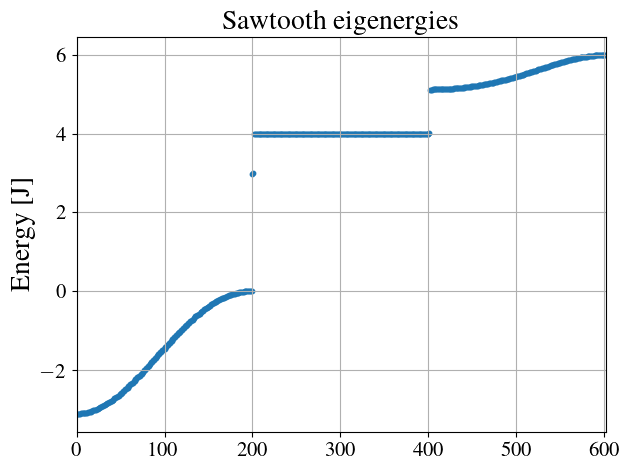

In [50]:
fig, ax = plt.subplots(tight_layout=True)

ax.scatter(np.arange(len(eigvals)),eigvals,s=10)

ax.set_title("Sawtooth eigenergies",fontsize=20)
ax.set_ylabel(r"Energy [J]",fontsize=20)

ax.set_xlim(0,len(eigvals))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.grid()
#plt.savefig("spectrum_sawtooth.png")
plt.show()

In [51]:
t = np.linspace(0,150,50)
pop, phot = time_evol(t,H,2,[1.,0.])

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:24<00:00,  2.05it/s]


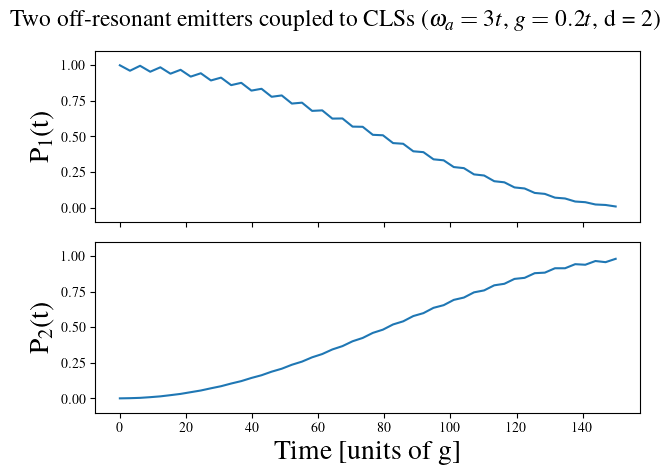

In [52]:
fig, ax = plt.subplots(nrows=2,ncols=1,sharex=True,tight_layout=1)

plt.suptitle(r"Two off-resonant emitters coupled to CLSs ($\omega_a = 3t$, $g=0.2t$, d = 2)",fontsize=17)
ax[0].plot(t,pop[0]*np.conjugate(pop[0]))
#ax[0].plot(t,np.cos(gg*t)**2, ls = "--", label=f"$\Omega = {gg:.2e}$")
ax[1].plot(t,pop[1]*np.conjugate(pop[1]))
#ax[1].plot(t,np.sin(gg*t)**2, ls= "--")


ax[0].set_ylabel(r"P$_1$(t)",fontsize=20)
ax[1].set_ylabel(r"P$_2$(t)",fontsize=20)
ax[1].set_xlabel("Time [units of g]",fontsize=20)

ax[0].set_ylim(-0.1,1.1)
ax[1].set_ylim(-0.1,1.1)
#ax[0].legend()

#plt.savefig(f"two_em/CLSd2.png")
plt.show()